In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels import robust

In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19_std.csv', 
                     encoding='utf-8',
                    sep=',')
df1.head()
pd.set_option("display.max_rows", None)

In [3]:
df1.info()
df1['Fecha']=pd.to_datetime(df1['Fecha'])
df1['Fecha']=df1['Fecha'].dt.normalize()
df=df1[['Fecha','Comuna','Codigo comuna','Casos confirmados']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64798 entries, 0 to 64797
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             64798 non-null  object 
 1   Codigo region      64798 non-null  int64  
 2   Comuna             64798 non-null  object 
 3   Codigo comuna      61934 non-null  float64
 4   Poblacion          61934 non-null  float64
 5   Fecha              64798 non-null  object 
 6   Casos confirmados  64379 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 3.5+ MB


In [4]:
df_lc=df[df['Codigo comuna']==13114]

In [5]:
df_lc.head(5)
df_lc.reset_index(inplace=True)
df_lc=df_lc.drop(columns='index')
df_lc_=df_lc
df_lc_.head()

,Fecha,Comuna,Codigo comuna,Casos confirmados
0,2020-03-30,Las Condes,13114.0,181.0
1,2020-04-01,Las Condes,13114.0,208.0
2,2020-04-03,Las Condes,13114.0,224.0
3,2020-04-06,Las Condes,13114.0,258.0
4,2020-04-08,Las Condes,13114.0,266.0


In [6]:
df_lc['Casos confirmados']=df_lc['Casos confirmados'].diff().fillna(df_lc_.loc[0,'Casos confirmados'])
df_lc.head(10)

,Fecha,Comuna,Codigo comuna,Casos confirmados
0,2020-03-30,Las Condes,13114.0,181.0
1,2020-04-01,Las Condes,13114.0,27.0
2,2020-04-03,Las Condes,13114.0,16.0
3,2020-04-06,Las Condes,13114.0,34.0
4,2020-04-08,Las Condes,13114.0,8.0
5,2020-04-10,Las Condes,13114.0,15.0
6,2020-04-13,Las Condes,13114.0,15.0
7,2020-04-15,Las Condes,13114.0,10.0
8,2020-04-17,Las Condes,13114.0,14.0
9,2020-04-20,Las Condes,13114.0,6.0


In [7]:
df_lc.loc[81,'Fecha'].year

2021

In [8]:
def semanas(df):
    df['semana']=''
    inicio=df.loc[0,'Fecha'].week
    for i in range(len(df)):
        
        if df.loc[i,'Fecha'].year==2020:
            df.loc[i,'semana']= df.loc[i,'Fecha'].week-inicio
        
        elif df.loc[i,'Fecha'].week<53:
            
            df.loc[i,'semana']= df.loc[i,'Fecha'].week-inicio+53*(df.loc[i,'Fecha'].year-2020)
        else:
            df.loc[i,'semana']= df.loc[i,'Fecha'].week-inicio
    return df      

In [9]:
semanas(df_lc).head()

,Fecha,Comuna,Codigo comuna,Casos confirmados,semana
0,2020-03-30,Las Condes,13114.0,181.0,0
1,2020-04-01,Las Condes,13114.0,27.0,0
2,2020-04-03,Las Condes,13114.0,16.0,0
3,2020-04-06,Las Condes,13114.0,34.0,1
4,2020-04-08,Las Condes,13114.0,8.0,1


In [10]:
data=semanas(df_lc).groupby(['semana'])['Casos confirmados'].sum().reset_index()
data.head()

,semana,Casos confirmados
0,0,224.0
1,1,57.0
2,2,39.0
3,3,26.0
4,4,63.0


## Existencia de outliers?
####

<AxesSubplot:ylabel='Casos confirmados'>

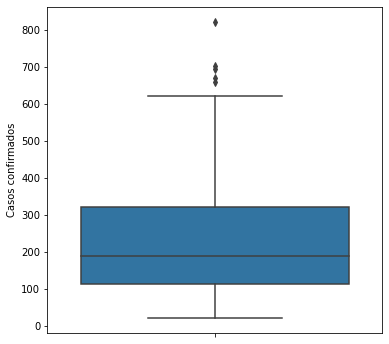

In [11]:
plt.figure(figsize=(6,6))

sns.boxplot(y='Casos confirmados', data=data)


In [12]:
data.loc[data['Casos confirmados'] >= 320].reset_index().drop(columns='index')  # outliers por visualización

,semana,Casos confirmados
0,6,335.0
1,7,478.0
2,8,702.0
3,9,606.0
4,10,623.0
5,11,822.0
6,12,555.0
7,13,336.0
8,49,417.0
9,50,500.0


In [13]:
#### outliers por metodo MAD
def mad_method(df, variable_name):
    df.dropna(inplace=True)
    med = np.median(df[variable_name], axis = 0)
    mad = np.abs(stats.median_abs_deviation(df[variable_name]))
    print(med, mad)
    threshold = 3
    outlier = []
    for i, v in enumerate(df[variable_name]):
        t = (v-med)/mad
        if t > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

In [14]:
data.iloc[mad_method(data,'Casos confirmados')].reset_index().drop(columns='index')

190.0 86.0


,semana,Casos confirmados
0,7,478.0
1,8,702.0
2,9,606.0
3,10,623.0
4,11,822.0
5,12,555.0
6,50,500.0
7,51,567.0
8,52,670.0
9,53,507.0
